<a href="https://colab.research.google.com/github/mohankrishnas3/Cloud/blob/main/Cloud_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Units are measured in meters

Highway_Total_distance = 11000

Coverage = 100 

AP0 = 50

AP2 = 2050

AP3 = 4050

AP4 = 6050

AP5 = 8050

AP6 = 10050

## Strategy 1
This is base line strategy which can be used when vehicular cloud was implemented on highway and this strategy drops heavy time consuming jobs but we will improve this strategy in next steps of this project 

In [ ]:
import pandas as pd
car_job_information_df = pd.DataFrame(columns=['Vehicle_ID', 'Vehicle_speed','Arrival time','Residency_time_seconds', 'Job_ID_assigned', 'Job_total_completion_time'])

#Maximum highway speed 60 kilometers per hour or 60000 meters per hour
#Highway patrol police make sure that cars entered are not jammed in traffic on highway

import random
import numpy as np
import string
import time


# defining function for random
# string id with parameter
def ran_gen(size, chars=string.ascii_uppercase + string.digits):
    return ''.join(random.choice(chars) for x in range(size))

car_job_information_dict = {}

for i in range(100): 
  # function call for random string
  # generation with size 8 and string
  Vehicle_number = ran_gen(8, "AEIOSUMA23")
  car_job_information_dict['Vehicle_ID'] = Vehicle_number

  np.random.seed(random.randint(0,100000))
  Vehicle_arrival_time = random.randint(0,3600) # in seconds
  car_job_information_dict['Arrival time'] = Vehicle_arrival_time


  import time

  # np.random.seed(int(time.time()))
  np.random.seed(random.randint(0,100000))
  In_speed_kilometers_per_hour = abs(np.random.normal(size = 4, loc = 40, scale = 10)[0]) # geneating speed mean = 30 , standard_deviation = 20

  In_speed_meters_per_second = In_speed_kilometers_per_hour * 1000/3600
  car_job_information_dict['Vehicle_speed'] = In_speed_meters_per_second

  Residency_time_seconds = Highway_Total_distance/In_speed_meters_per_second
  car_job_information_dict['Residency_time_seconds'] = Residency_time_seconds

  Job_id_number = ran_gen(3, "AEIOSUMA23")
  Job_size = 10 #mb

  np.random.seed(random.randint(0,100000))
  Job_Processing = abs(np.random.normal(size = 4, loc = 700, scale = 40)[0])  # geneating job processing time mean = 400 , standard_deviation = 40

  Job_download_time = 1 # seconds
  Job_upload_time = 1 # seconds
  Job_total_completion_time = Job_download_time + Job_Processing + Job_upload_time

  if(Residency_time_seconds > Job_total_completion_time):
    job_assigned = Job_id_number
  else:
    job_assigned = 0

  print("Vehice number is", Vehicle_number)
  print("Speed of Vehicle entered is", In_speed_kilometers_per_hour, "Km/Hour")
  print("Residency time of vehicle",Residency_time_seconds, "Seconds")


  if(job_assigned == 0):
    print("No Job assigned")
    car_job_information_dict['Job_ID_assigned'] = 0
    car_job_information_dict['Job_total_completion_time'] = 0
  else:
    print("ID of the job assigned is",Job_id_number)
    print("Size of the job is", Job_size)
    print("Total Job Processing time", Job_total_completion_time)
    car_job_information_dict['Job_ID_assigned'] = job_assigned
    car_job_information_dict['Job_total_completion_time'] = Job_total_completion_time

  # print(car_job_information_dict)
  car_job_information_df = car_job_information_df.append(car_job_information_dict, ignore_index=True)
  car_job_information_dict.clear()


# car_job_information_df['Residency_time_seconds']=car_job_information_df['Residency_time_seconds'].astype(int)
# car_job_information_df['Job_total_completion_time']=car_job_information_df['Job_total_completion_time'].astype(int)

# print(car_job_information_df)
csv_data = car_job_information_df.to_csv("Car_and_Job_information_strategy_1.csv")

Vehice number is 2333U3UE
Speed of Vehicle entered is 51.535283157633984 Km/Hour
Residency time of vehicle 768.4055965865787 Seconds
ID of the job assigned is EAA
Size of the job is 10
Total Job Processing time 735.5167327238984
Vehice number is AOMEAUMO
Speed of Vehicle entered is 52.11082540520887 Km/Hour
Residency time of vehicle 759.9188785069921 Seconds
ID of the job assigned is 3AU
Size of the job is 10
Total Job Processing time 643.3835832863697
Vehice number is M2S3MU3I
Speed of Vehicle entered is 50.48556454287793 Km/Hour
Residency time of vehicle 784.382632115905 Seconds
ID of the job assigned is S2O
Size of the job is 10
Total Job Processing time 756.3941958815782
Vehice number is AISU223E
Speed of Vehicle entered is 43.6559938540063 Km/Hour
Residency time of vehicle 907.0919363886139 Seconds
ID of the job assigned is 3OA
Size of the job is 10
Total Job Processing time 654.6475788387511
Vehice number is S2MAEIEO
Speed of Vehicle entered is 28.767965245444223 Km/Hour
Residenc

Graph between Residency time and total job completion time

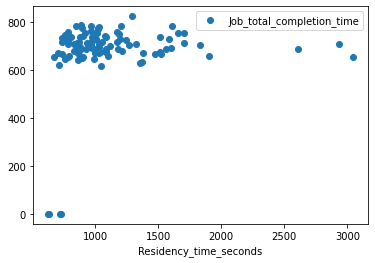

In [ ]:
car_job_information_df.plot(x='Residency_time_seconds', y='Job_total_completion_time', style='o')


## Strategy 2
Instead of dropping jobs push jobs into stack which has high job completion time.
When ever vehicle comes calculate residency time of the vechicle and check whether is there any jobs that has total job completion time less than residency time of vehicle and if yes then assign that job on that stack to that vehicle
If no such job is found then assign new job to that vehicle if total job completion time is lesser than residency time of the vehicle

In [ ]:
import csv
with open('stack.csv', 'w') as creating_new_csv_file: 
  writer = csv.writer(creating_new_csv_file)
  writer.writerow(['Job_ID_assigned', 'Job_total_completion_time','status']) 
print("Empty File Created Successfully")

import pandas as pd
job_stack_df = pd.DataFrame(columns=['Job_ID_assigned', 'Job_total_completion_time','status'])
car_job_information_df = pd.DataFrame(columns=['Vehicle_ID', 'Vehicle_speed','Arrival time','Residency_time_seconds', 'Job_ID_assigned', 'Job_total_completion_time'])

job_stack_df.drop(job_stack_df.index, inplace=True)
car_job_information_df.drop(car_job_information_df.index, inplace=True)



#Maximum highway speed 60 kilometers per hour or 60000 meters per hour
#Highway patrol police make sure that cars entered are not jammed in traffic on highway

import random
import numpy as np
import string
import time



# defining function for random
# string id with parameter
def ran_gen(size, chars=string.ascii_uppercase + string.digits):
    return ''.join(random.choice(chars) for x in range(size))

car_job_information_dict = {}

for i in range(100): 
  # function call for random string
  # generation with size 8 and string
  Vehicle_number = ran_gen(8, "AEIOSUMA23")
  car_job_information_dict['Vehicle_ID'] = Vehicle_number

  np.random.seed(random.randint(0,100000))
  Vehicle_arrival_time = random.randint(0,3600) # in seconds
  car_job_information_dict['Arrival time'] = Vehicle_arrival_time


  import time

  # np.random.seed(int(time.time()))
  np.random.seed(random.randint(0,100000))
  In_speed_kilometers_per_hour = abs(np.random.normal(size = 4, loc = 40, scale = 10)[0]) # geneating speed mean = 30 , standard_deviation = 20

  In_speed_meters_per_second = In_speed_kilometers_per_hour * 1000/3600
  car_job_information_dict['Vehicle_speed'] = In_speed_meters_per_second

  Residency_time_seconds = Highway_Total_distance/In_speed_meters_per_second
  car_job_information_dict['Residency_time_seconds'] = Residency_time_seconds

  found = 0
  with open('stack.csv') as file_obj:
      
    # Create reader object by passing the file 
    # object to reader method
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv 
    # file using reader object
    for row in reader_obj:
        print(row)
        if(row[2]=="not_assigned" ):
          print(row[1])
          if(Residency_time_seconds > float(row[1]) ):
            found = 1
            car_job_information_dict['Job_ID_assigned'] = row[0]
            car_job_information_dict['Job_total_completion_time'] = row[1]
  
  if(found == 0):
    Job_id_number = ran_gen(3, "AEIOSUMA23")
    Job_size = 10 #mb

    np.random.seed(random.randint(0,100000))
    Job_Processing = abs(np.random.normal(size = 4, loc = 700, scale = 40)[0])  # geneating job processing time mean = 400 , standard_deviation = 40

    Job_download_time = 1 # seconds
    Job_upload_time = 1 # seconds
    Job_total_completion_time = Job_download_time + Job_Processing + Job_upload_time

    if(Residency_time_seconds > Job_total_completion_time):
      job_assigned = Job_id_number
    else:
      job_assigned = 0
      fields = []
      fields.append(job_assigned)
      fields.append(Job_total_completion_time)
      fields.append("not_assigned") 
      with open(r'stack.csv', 'a') as f:
        writer = csv.writer(f)
        writer.writerow(fields)
        fields.clear()
      # stack_df_refine = pd.read_csv('stack.csv')
      # df_new = stack_df_refine[stack_df_refine["Job_ID_assigned"].str.contains(job_assigned) == False]
      # df_new.to_csv("stack.csv")

    if(job_assigned == 0):
      print("No Job assigned")
      car_job_information_dict['Job_ID_assigned'] = 0
      car_job_information_dict['Job_total_completion_time'] = 0
    else:
      print("ID of the job assigned is",Job_id_number)
      print("Size of the job is", Job_size)
      print("Total Job Processing time", Job_total_completion_time)
      car_job_information_dict['Job_ID_assigned'] = job_assigned
      car_job_information_dict['Job_total_completion_time'] = Job_total_completion_time



    # print(car_job_information_dict)
    car_job_information_df = car_job_information_df.append(car_job_information_dict, ignore_index=True)
    car_job_information_dict.clear()
    

csv_data = car_job_information_df.to_csv("Car_and_Job_information_strategy_2.csv")



Empty File Created Successfully
['Job_ID_assigned', 'Job_total_completion_time', 'status']
No Job assigned
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['0', '692.2314955308813', 'not_assigned']
692.2314955308813
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['0', '692.2314955308813', 'not_assigned']
692.2314955308813
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['0', '692.2314955308813', 'not_assigned']
692.2314955308813
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['0', '692.2314955308813', 'not_assigned']
692.2314955308813
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['0', '692.2314955308813', 'not_assigned']
692.2314955308813
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['0', '692.2314955308813', 'not_assigned']
692.2314955308813
['Job_ID_assigned', 'Job_total_completion_time', 'status']
['0', '692.2314955308813', 'not_assigned']
692.2314955308813
No Job assigned
['Job_ID_assigned', 'Job_total_comple

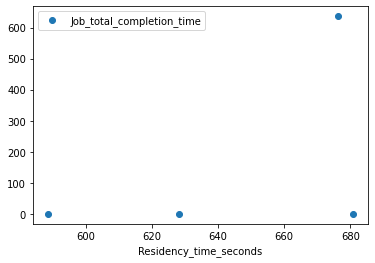

In [ ]:
car_job_information_df.plot(x='Residency_time_seconds', y='Job_total_completion_time', style='o')


### Strategy 3
Strategy 3 is same as strategy 2 but you are dividing bigger jobs into 2 jobs and pushing it on stack to make sure job completion time is less than incoming vehicle residency time. When ever vehicle comes calculate residency time of the vechicle and check whether is there any jobs that has total job completion time less than residency time of vehicle and if yes then assign that job on that stack to that vehicle If no such job is found then assign new job to that vehicle if total job completion time is lesser than residency time of the vehicle

In [ ]:
import csv
with open('stack_strategy_3.csv', 'w') as creating_new_csv_file: 
  writer = csv.writer(creating_new_csv_file)
  writer.writerow(['Job_ID_assigned', 'Job_total_completion_time','status']) 
# print("Empty File Created Successfully")

import pandas as pd
job_stack_df = pd.DataFrame(columns=['Job_ID_assigned', 'Job_total_completion_time','status'])
car_job_information_df = pd.DataFrame(columns=['Vehicle_ID', 'Vehicle_speed','Arrival time','Residency_time_seconds', 'Job_ID_assigned', 'Job_total_completion_time'])

job_stack_df.drop(job_stack_df.index, inplace=True)
car_job_information_df.drop(car_job_information_df.index, inplace=True)



#Maximum highway speed 60 kilometers per hour or 60000 meters per hour
#Highway patrol police make sure that cars entered are not jammed in traffic on highway

import random
import numpy as np
import string
import time



# defining function for random
# string id with parameter
def ran_gen(size, chars=string.ascii_uppercase + string.digits):
    return ''.join(random.choice(chars) for x in range(size))

car_job_information_dict = {}

for i in range(500): 
  # function call for random string
  # generation with size 8 and string
  Vehicle_number = ran_gen(8, "AEIOSUMA23")
  car_job_information_dict['Vehicle_ID'] = Vehicle_number

  np.random.seed(random.randint(0,100000))
  Vehicle_arrival_time = random.randint(0,3600) # in seconds
  car_job_information_dict['Arrival time'] = Vehicle_arrival_time


  import time

  # np.random.seed(int(time.time()))
  np.random.seed(random.randint(0,100000))
  In_speed_kilometers_per_hour = abs(np.random.normal(size = 4, loc = 40, scale = 10)[0]) # geneating speed mean = 30 , standard_deviation = 20

  In_speed_meters_per_second = In_speed_kilometers_per_hour * 1000/3600
  car_job_information_dict['Vehicle_speed'] = In_speed_meters_per_second

  Residency_time_seconds = Highway_Total_distance/In_speed_meters_per_second
  car_job_information_dict['Residency_time_seconds'] = Residency_time_seconds

  found = 0
  with open('stack.csv') as file_obj:
      
    # Create reader object by passing the file 
    # object to reader method
    reader_obj = csv.reader(file_obj)
      
    # Iterate over each row in the csv 
    # file using reader object
    for row in reader_obj:
        # print(row)
        if(row[2]=="not_assigned" ):
          # print(row[1])
          if(Residency_time_seconds > float(row[1]) ):
            found = 1
            car_job_information_dict['Job_ID_assigned'] = row[0]
            car_job_information_dict['Job_total_completion_time'] = row[1]
  
  if(found == 0):
    Job_id_number = ran_gen(3, "AEIOSUMA23")
    Job_size = 10 #mb

    np.random.seed(random.randint(0,100000))
    Job_Processing = abs(np.random.normal(size = 4, loc = 700, scale = 40)[0])  # geneating job processing time mean = 400 , standard_deviation = 40

    Job_download_time = 1 # seconds
    Job_upload_time = 1 # seconds
    Job_total_completion_time = Job_download_time + Job_Processing + Job_upload_time

    if(Residency_time_seconds > Job_total_completion_time):
      job_assigned = Job_id_number
    elif (Residency_time_seconds < Job_total_completion_time):
      job_assigned = Job_id_number
      Job_Processing_first_half = Job_total_completion_time - Residency_time_seconds - 5
      Job_total_completion_time_first_half = Job_download_time + Job_Processing_first_half + Job_upload_time
      Job_total_completion_time = Job_Processing_first_half
      Job_total_completion_time = Job_total_completion_time_first_half

      Job_id_number_second_half = ran_gen(3, "AEIOSUMA23")
      Job_size = 10 #mb
      Job_Processing_second_half = Job_total_completion_time - Job_total_completion_time_first_half
      fields2 = []
      fields2.append(Job_id_number_second_half)
      fields2.append(Job_Processing_second_half)
      fields2.append("not_assigned") 
      with open(r'stack_strategy_3.csv', 'a') as f:
        writer = csv.writer(f)
        writer.writerow(fields2)
        fields2.clear()
    else:
      job_assigned = 0
      fields = []
      fields.append(job_assigned)
      fields.append(Job_total_completion_time)
      fields.append("not_assigned") 
      with open(r'stack_strategy_3.csv', 'a') as f:
        writer = csv.writer(f)
        writer.writerow(fields)
        fields.clear()
      # stack_df_refine = pd.read_csv('stack.csv')
      # df_new = stack_df_refine[stack_df_refine["Job_ID_assigned"].str.contains(job_assigned) == False]
      # df_new.to_csv("stack.csv")

    if(job_assigned == 0):
    # print("No Job assigned")
      car_job_information_dict['Job_ID_assigned'] = 0
      car_job_information_dict['Job_total_completion_time'] = 0
    else:
      print("ID of the job assigned is",Job_id_number)
      print("Size of the job is", Job_size)
      print("Total Job Processing time", Job_total_completion_time)
      car_job_information_dict['Job_ID_assigned'] = job_assigned
      car_job_information_dict['Job_total_completion_time'] = Job_total_completion_time



    # print(car_job_information_dict)
    car_job_information_df = car_job_information_df.append(car_job_information_dict, ignore_index=True)
    car_job_information_dict.clear()
    

csv_data = car_job_information_df.to_csv("Car_and_Job_information_strategy_2.csv")



ID of the job assigned is OEI
Size of the job is 10
Total Job Processing time 99.37613045916123
ID of the job assigned is UO3
Size of the job is 10
Total Job Processing time 687.9843050811334
ID of the job assigned is MSA
Size of the job is 10
Total Job Processing time 652.8963584330542
ID of the job assigned is IAE
Size of the job is 10
Total Job Processing time 81.34911777777904
ID of the job assigned is ASS
Size of the job is 10
Total Job Processing time 10.875360430062415
ID of the job assigned is 3SI
Size of the job is 10
Total Job Processing time 655.3928214523056
ID of the job assigned is I3O
Size of the job is 10
Total Job Processing time 60.47977620740539
ID of the job assigned is SUS
Size of the job is 10
Total Job Processing time 104.15428406406795
ID of the job assigned is OE3
Size of the job is 10
Total Job Processing time 92.89163868176854
ID of the job assigned is MAU
Size of the job is 10
Total Job Processing time 648.3360345717002
ID of the job assigned is 2AE
Size of 

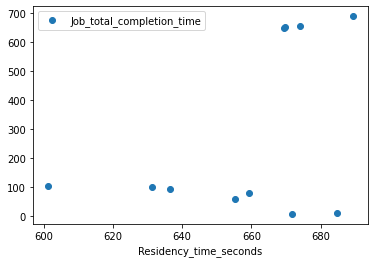

In [ ]:
car_job_information_df.plot(x='Residency_time_seconds', y='Job_total_completion_time', style='o')

You can see that for strategy 3 job completion time has decreased a lot compared to strategy 1 and strategy 2.

### Strategy 4 - Using AI
Using AI to choose which car to migrate. Suppose if many cars come at same time or we have to migrate VM to different cars. Again lets suppose all of them have same speed and same residency time. Then we can use AI to choose best car based on it  specifications because few cars also break down during highway due to poor enginer performance. Some cars also will meet with accident when break failure happens due to its poor maintanance or if it car was highly used by its previous owners. So when ever break down or accident or enginer failure or break failure happens not only car but also job assigned to it is also lost. So using AI to choose best car to migrate VM or while assigning jobs to the car is the best thing.

For this sake, I have collected dataset and built model which gives performance score of the car. 0 for poor performance car and as the score increases implies performance also increases. We have used several methods while training this dataset and choose the method for the model which gives best accuracy.

The dataset has following columns  </br>

"Name": Name of car for example: Maruti Wagon R, Honda etc </br>
"Location": Location of the car </br>
"Year": Purchased year of the car </br>
"Kilometers": Kilometers of the car used </br>
"Fuel_Type": Type of the fuel of the car such as "petrol", "Diesel" etc </br>
"Transmission": Transmission type of the car whether it is manual or automatic
"Owner_Type": Owner type of the car whether it is first ownered car or second ownered car </br>
"Mileage": Mileage of the car </br>
"Engine": Engine power of the car for example 950 CC, 1000 CC etc </br>
"power":Power of the car for example 60 bhp, 100 bhp </br>
"Seats": Number of seats in a car </br>
"New_Price": New price of the car </br>


1. EDA
2. Data Cleaning & Data Correction
3. Feature Engineering & Visualization
4. Model Training and Model Evaluation
5. Cross Validation
6. Conclusion

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load Dataset

In [ ]:
df = pd.read_csv("/content/train-data.csv")

In [ ]:
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Performance_Score
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [ ]:
df.shape

(6019, 14)

Drop Unwanted Columns

In [ ]:
df.drop(["Unnamed: 0","New_Price"],axis=1,inplace=True)


In [ ]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Performance_Score
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


Check Null values


In [ ]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Performance_Score     0
dtype: int64

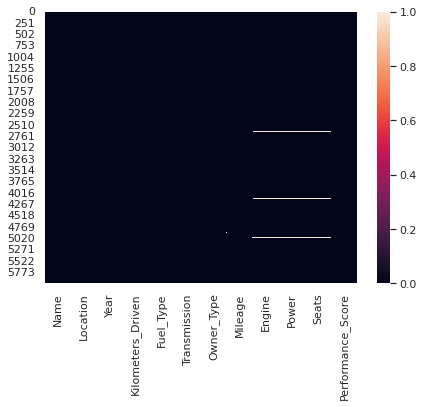

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull())
plt.show()

Data Cleaning and Correction of all Features


In [ ]:
df['Location'].value_counts()


Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [ ]:
df['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [ ]:
df[(df['Fuel_Type']=='Electric') | (df['Fuel_Type']=='LPG')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Performance_Score
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
936,Maruti Wagon R LXI LPG BSIV,Hyderabad,2012,72000,LPG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,2.85
987,Maruti Wagon R LXI DUO BSIII,Mumbai,2008,64226,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.0,1.45
2278,Hyundai Santro Xing GLS LPG,Pune,2010,55000,LPG,Manual,Second,13.45 km/kg,1086 CC,62.1 bhp,5.0,1.65
2385,Hyundai Santro Xing GLS LPG,Hyderabad,2011,17000,LPG,Manual,First,13.45 km/kg,1086 CC,62.1 bhp,5.0,3.10
2436,Hyundai i10 Magna LPG,Jaipur,2012,53000,LPG,Manual,Second,19.2 km/kg,1086 CC,68.05 bhp,5.0,2.85
2941,Hyundai Santro Xing GL Plus LPG,Hyderabad,2014,56000,LPG,Manual,First,13.45 km/kg,1086 CC,62.1 bhp,5.0,3.20
3595,Maruti Wagon R LX DUO BSIII,Hyderabad,2007,65047,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.0,1.95
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


In [ ]:
i =df[(df['Fuel_Type']=='LPG') | (df['Fuel_Type']=='Electric')].index
df.drop(i,axis=0,inplace=True)

conclusion:
There are very very less car with LPG and Electric as fuel system so we can drop it

In [ ]:
df['Transmission'].value_counts()

Manual       4289
Automatic    1718
Name: Transmission, dtype: int64

In [ ]:
df['Owner_Type'].value_counts()

First             4919
Second             966
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [ ]:
i = df[df['Owner_Type']=='Fourth & Above'].index
df.drop(i,axis=0,inplace=True)

In [ ]:
df['Seats'].value_counts()

5.0     4998
7.0      672
8.0      132
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [ ]:
df[df['Seats']>8]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Performance_Score
814,Toyota Qualis FS B2,Pune,2004,77757,Diesel,Manual,Second,13.1 kmpl,2446 CC,75 bhp,10.0,3.50
917,Tata Sumo DX,Mumbai,2013,20000,Diesel,Manual,First,14.07 kmpl,1978 CC,83.1 bhp,10.0,5.25
1347,Mahindra Scorpio LX BS IV,Bangalore,2007,74112,Diesel,Manual,First,12.05 kmpl,2179 CC,120 bhp,9.0,4.10
1907,Toyota Qualis FS B3,Bangalore,2002,63000,Diesel,Manual,Third,13.1 kmpl,2446 CC,75 bhp,10.0,3.65
2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0 kmpl,2446 CC,null bhp,10.0,3.50
2312,Chevrolet Tavera LT 9 Str BS IV,Kolkata,2012,67132,Diesel,Manual,First,13.58 kmpl,2499 CC,78 bhp,9.0,4.75
2359,Mahindra Xylo D2 Maxx,Chennai,2016,150000,Diesel,Manual,First,14.95 kmpl,2489 CC,93.7 bhp,9.0,4.50
2575,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2015,120000,Diesel,Manual,First,14.8 kmpl,2499 CC,80 bhp,10.0,5.50


In [ ]:
df['Seats']=np.where(df['Seats']>8,6,df['Seats'])
df.drop(df[df['Seats']==0].index,axis=0,inplace=True)
df['Seats'].value_counts()

5.0    4998
7.0     672
8.0     132
4.0      99
6.0      39
2.0      16
Name: Seats, dtype: int64

conclusion:
10 setaers and 0 seats sedan cars are not availables in realife
so we can replace 10 setaers with mode of seats lets say 6

In [ ]:
df['Name'].value_counts()

Mahindra XUV500 W8 2WD                 49
Maruti Swift VDI                       45
Honda City 1.5 S MT                    34
Maruti Swift Dzire VDI                 34
Maruti Swift VDI BSIV                  31
                                       ..
Mahindra Scorpio S10 AT 4WD             1
Hyundai i20 1.2 Era                     1
Toyota Camry W4 (AT)                    1
BMW 5 Series 2013-2017 520d M Sport     1
Mahindra Xylo D4 BSIV                   1
Name: Name, Length: 1862, dtype: int64

In [ ]:
df['Name'].nunique()

1862

Features spliting (Car & Model)


In [ ]:
df['Model']=df['Name'].map(lambda x: str(x).strip().split(" ")[1])
df['Name']=df['Name'].map(lambda x: str(x).strip().split(" ")[0])
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Performance_Score,Model
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Wagon
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Creta
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Jazz
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Ertiga
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,Swift
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,Xcent
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,Xylo
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,Wagon


In [ ]:
df['Model'].value_counts()

Swift         351
City          270
i20           246
Verna         170
Innova        162
             ... 
XUV300          1
Fortwo          1
Countryman      1
Clubman         1
F               1
Name: Model, Length: 210, dtype: int64

In [ ]:
df['Model'].value_counts()[df['Model'].value_counts()<5]

Avventura     4
V40           4
Hexa          4
R-Class       4
Tucson        4
             ..
XUV300        1
Fortwo        1
Countryman    1
Clubman       1
F             1
Name: Model, Length: 75, dtype: int64

conclusion:
As seen here there are total 1862 types of cars which is very high
we have make seperate features for car model and car manufactures ie(Name) by feature spliting

In [ ]:
df['Year'].value_counts()

2014    796
2015    744
2016    740
2013    649
2017    587
2012    575
2011    464
2010    339
2018    298
2009    197
2008    171
2007    122
2019    102
2006     77
2005     56
2004     31
2003     17
2002     15
2001      7
2000      4
1998      4
1999      2
Name: Year, dtype: int64

Covert data types into object
Year should be in object as its is category not a Numerical Number

In [ ]:
df['Year']=df['Year'].astype(str)
df['Year']=np.where(df['Year'].astype(int)<2003,"less than 2003",df['Year'])
df['Year'].value_counts()

2014              796
2015              744
2016              740
2013              649
2017              587
2012              575
2011              464
2010              339
2018              298
2009              197
2008              171
2007              122
2019              102
2006               77
2005               56
less than 2003     32
2004               31
2003               17
Name: Year, dtype: int64

conclusion:
As seen here there are total 22 differents years of car model
Cars with Years 2000,2001,2002,1998 & 1999 are very very less so we can make sepearte categ of "less than 2003" for all

In [ ]:
df['Kilometers_Driven'].isnull().sum()

0

In [ ]:
df.dtypes

Name                  object
Location              object
Year                  object
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Performance_Score    float64
Model                 object
dtype: object

In [ ]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               35
Power                35
Seats                41
Performance_Score     0
Model                 0
dtype: int64

In [ ]:
df['Mileage'].unique

<bound method Series.unique of 0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 5997, dtype: object>

In [ ]:
df['Mileage']=df['Mileage'].map(lambda x: str(x).strip().split(" ")[0])

Convert data type into float


In [ ]:
df['Mileage']=df['Mileage'].astype(float)

conclusion:
Data correction of Mileage feature (Numerical feature)
Then we convert data to float

In [ ]:
df['Engine'].unique

<bound method Series.unique of 0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
6014    1248 CC
6015    1120 CC
6016    2498 CC
6017     998 CC
6018     936 CC
Name: Engine, Length: 5997, dtype: object>

Data correction of Engine by paasing it through function fun()

In [ ]:
def fun(x):
    if x == None:
        return x
    elif len(str(x).split(" "))==2:
        return str(x).split(" ")[0]
df['Engine']=df['Engine'].apply(fun)
df['Engine'].isnull().sum()

35

Convert data type into float

In [ ]:
df['Engine']=df['Engine'].astype(float)

Replace Null values of Engine column by mean base on model

In [ ]:
lst = df['Model'].unique()
for i in lst:
    mean_model = df[df["Model"]==i]['Engine'].mean()
    df.update(df[df['Model']==i]['Engine'].fillna(mean_model))

In [ ]:
df['Power'].isnull().sum()

35

In [ ]:
df['Power'].unique

<bound method Series.unique of 0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 5997, dtype: object>

Data correction of power by paasing it through function

In [ ]:
df['Power']=df['Power'].apply(fun)
df['Power'].unique

<bound method Series.unique of 0       58.16
1       126.2
2        88.7
3       88.76
4       140.8
        ...  
6014       74
6015       71
6016      112
6017     67.1
6018     57.6
Name: Power, Length: 5997, dtype: object>

In [ ]:
df['Power'].isnull().sum()
df[df['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Performance_Score,Model
194,Honda,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,1494.718045,None,NaN,2.95,City
208,Maruti,Kolkata,2010,42001,Petrol,Manual,First,16.10,1240.447368,None,NaN,2.11,Swift
733,Maruti,Chennai,2006,97800,Petrol,Manual,Third,16.10,1240.447368,None,NaN,1.75,Swift
749,Land,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,2475.719298,None,NaN,26.50,Rover
1294,Honda,Delhi,2009,55005,Petrol,Manual,First,12.80,1494.718045,None,NaN,3.20,City
1327,Maruti,Hyderabad,2015,50295,Petrol,Manual,First,16.10,1240.447368,None,NaN,5.80,Swift
1385,Honda,Pune,2004,115000,Petrol,Manual,Second,0.00,1494.718045,None,NaN,1.50,City
1460,Land,Coimbatore,2008,69078,Petrol,Manual,First,0.00,2475.719298,None,NaN,40.88,Rover
2074,Maruti,Pune,2011,24255,Petrol,Manual,First,16.10,1240.447368,None,NaN,3.15,Swift
2096,Hyundai,Coimbatore,2004,52146,Petrol,Manual,First,0.00,1077.044118,None,NaN,1.93,Santro


Replace Null values of Power column by mean base on model

In [ ]:
lst = df['Model'].unique()
for i in lst:
    mean_model = df[df["Model"]==i]['Seats'].mode(0)[0]
    df.update(df[df['Model']==i]['Seats'].fillna(mean_model))
df[df['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Performance_Score,Model
194,Honda,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,1494.718045,None,5.0,2.95,City
208,Maruti,Kolkata,2010,42001,Petrol,Manual,First,16.10,1240.447368,None,5.0,2.11,Swift
733,Maruti,Chennai,2006,97800,Petrol,Manual,Third,16.10,1240.447368,None,5.0,1.75,Swift
749,Land,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,2475.719298,None,5.0,26.50,Rover
1294,Honda,Delhi,2009,55005,Petrol,Manual,First,12.80,1494.718045,None,5.0,3.20,City
1327,Maruti,Hyderabad,2015,50295,Petrol,Manual,First,16.10,1240.447368,None,5.0,5.80,Swift
1385,Honda,Pune,2004,115000,Petrol,Manual,Second,0.00,1494.718045,None,5.0,1.50,City
1460,Land,Coimbatore,2008,69078,Petrol,Manual,First,0.00,2475.719298,None,5.0,40.88,Rover
2074,Maruti,Pune,2011,24255,Petrol,Manual,First,16.10,1240.447368,None,5.0,3.15,Swift
2096,Hyundai,Coimbatore,2004,52146,Petrol,Manual,First,0.00,1077.044118,None,5.0,1.93,Santro


Convert data type of power into float

In [ ]:
df['Power'] = pd.to_numeric(df['Power'],errors='coerce')
a = df['Model'].unique()
for i in a:
    r = df[df["Model"]==i]['Power'].astype(float).mean()
    df.update(df[df['Model']==i]['Power'].fillna(r))
df.dropna(axis=0,inplace=True)

Check Null values again

In [ ]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Performance_Score    0
Model                0
dtype: int64

Check data types

In [ ]:
df.dtypes

Name                  object
Location              object
Year                  object
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Performance_Score    float64
Model                 object
dtype: object

Conclusion:
We have done EDA, data cleaning and data conversion of all features
Now we will visualise all features
we will sort out all important features which dominate more to predict output or target feature ie Performance_Score

Feature Engineering & Visualization

Total Cars of all Companies

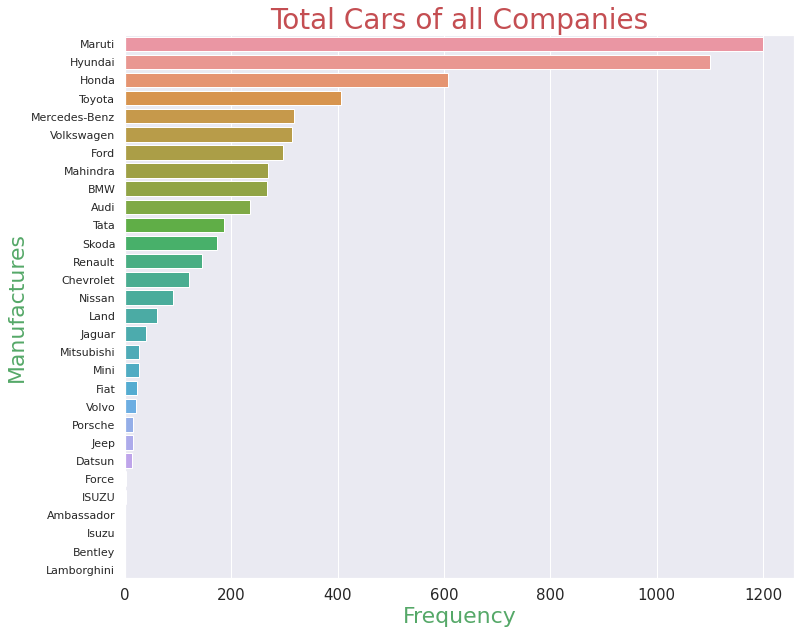

In [ ]:
plt.figure(figsize=(12,10))
most_cat = df['Name'].value_counts()
sns.barplot(x=most_cat, y=most_cat.index, data=df)
plt.xticks(size=15)
plt.xlabel("Frequency",size=22,c="g")
plt.ylabel("Manufactures",size=22,c="g")
plt.title("Total Cars of all Companies",size=28,c="r")
plt.show()

conclusion :
As seen Bently, Force, Lamborghini, and Isuzu cars are very very less
so these will act as outlier we will drop it

In [ ]:
df['Name'].value_counts()[df['Name'].value_counts()<5]

Force          3
ISUZU          2
Ambassador     1
Isuzu          1
Bentley        1
Lamborghini    1
Name: Name, dtype: int64

In [ ]:
i = df['Name'].value_counts()[df['Name'].value_counts()<5].index
index = df[df['Name'].isin(i)].index
df.drop(index,axis=0,inplace=True)

Total Cars Location wise

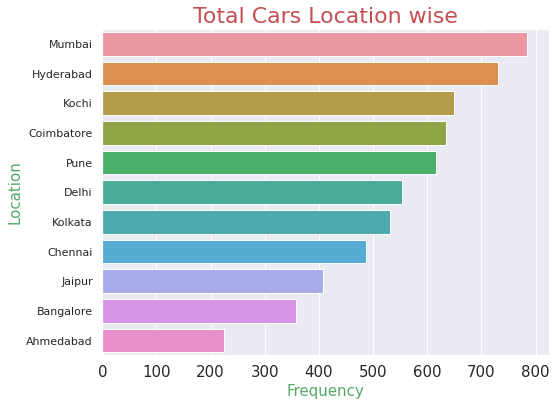

In [ ]:
plt.figure(figsize=(8,6))
most_cat = df['Location'].value_counts()
sns.barplot(x=most_cat, y=most_cat.index, data=df)
plt.xticks(size=15)
plt.xlabel("Frequency",size=15,c="g")
plt.ylabel("Location",size=15,c="g")
plt.title("Total Cars Location wise",size=22,c="r")
plt.show()

conclusion :
As seen cars from mumbai hyderbad and Kochi are very high
cars from ahmedabad are very less as compared to all
so we can say that location is some what imp feature

Performance Scores of differents manufactures

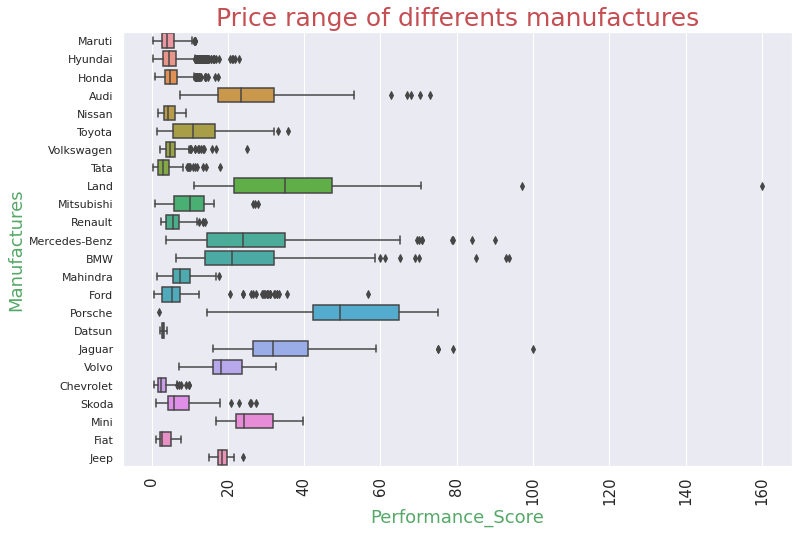

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,y="Name",x="Performance_Score")
plt.xlabel("Performance_Score",size=18,c="g")
plt.ylabel("Manufactures",size=18,c="g")
plt.title("Performance Scores range of differents manufactures",size=25,c="r")
plt.xticks(rotation='vertical',size=15)
plt.show()

conclusion :
Here clearly we can see that performance of cars more depends on its brand
range of performance is different for differents brand

All Categ with their Rating

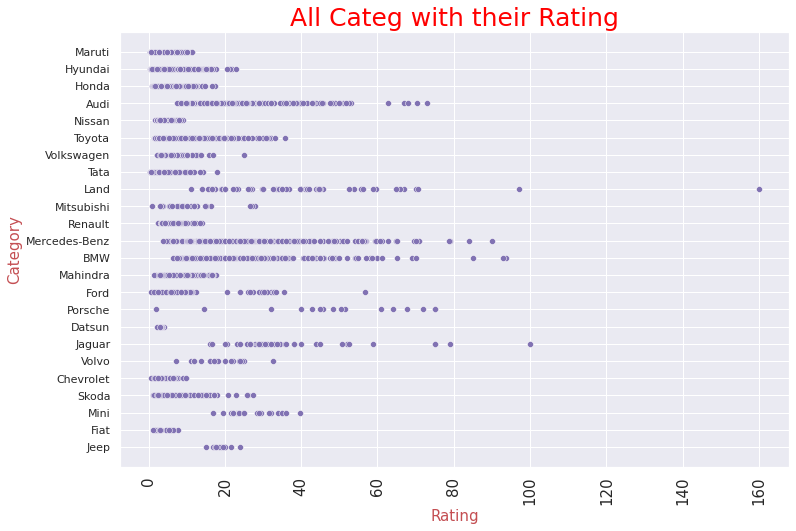

In [ ]:
plt.figure(figsize=(12,8)) 
sns.scatterplot(data=df,y="Name",x='Performance_Score',color="m")
plt.xticks(rotation='vertical',size=15)
plt.xlabel("Rating",size=15,c="r")
plt.ylabel("Category",size=15,c="r")
plt.title("All Categ with their Rating",size=25,c="red")
plt.show()

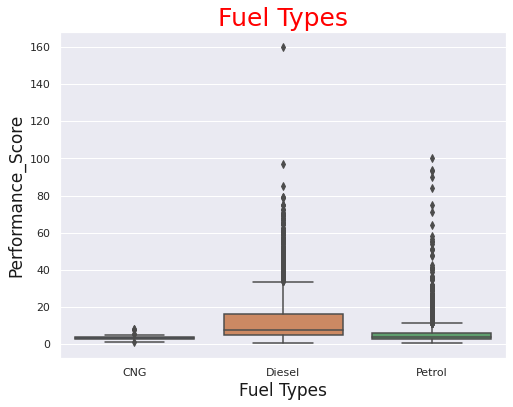

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x="Fuel_Type",y="Performance_Score")
plt.xlabel("Fuel Types",size=17,c="k")
plt.ylabel("Performance_Score",size=17,c="k")
plt.title("Fuel Types",size=25,c="red")
plt.show()

conclusion :
See Performance Scores for different fuel types
Performance Scores of diesel cars are more than petrol

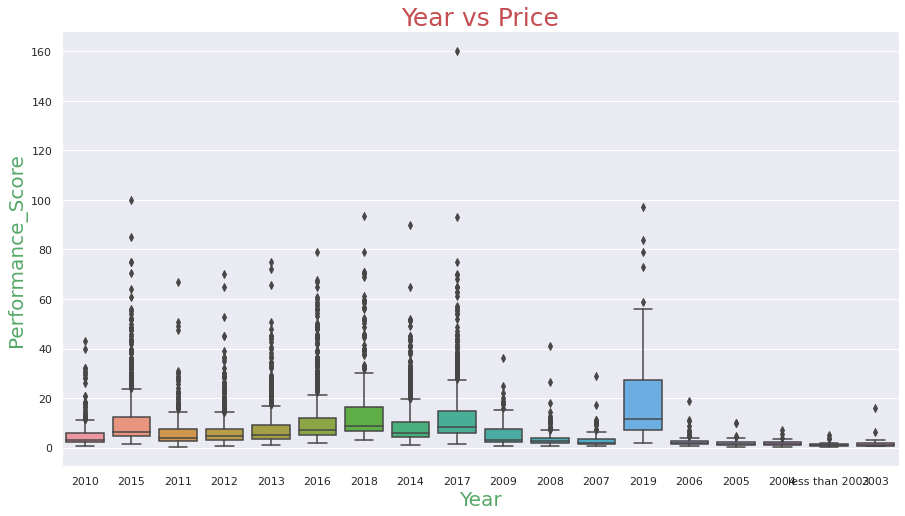

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x="Year",y="Performance_Score")
plt.xlabel("Year",size=20,c="g")
plt.ylabel("Performance_Score",size=20,c="g")
plt.title("Year vs Performance_Score",size=25,c="r")
plt.show()

conclusion :
so clearly seen that as car become older its Performance Score get reduces
Year of car is imp to predict output

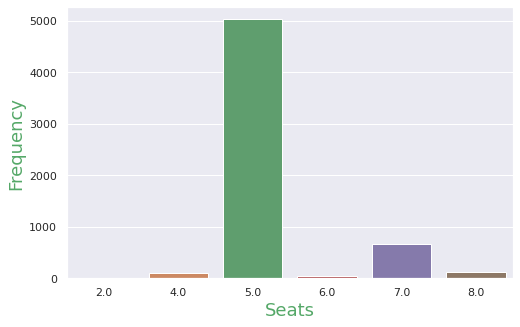

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x="Seats")
plt.xlabel("Seats",size=18,c="g")
plt.ylabel("Frequency",size=18,c="g")
plt.show()

conclusion :
Frequency of 5 seaters cas is very very high as compared to other
But ites not so imp to predict output

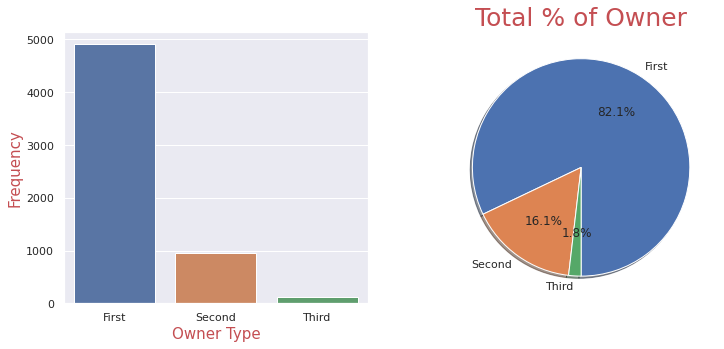

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x="Owner_Type")
plt.xlabel("Owner Type",size=15,c="r")
plt.ylabel("Frequency",size=15,c="r")
plt.subplot(1,2,2)
labels =df['Owner_Type'].value_counts(sort = True).index
sizes = df['Owner_Type'].value_counts(sort = True)
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('Total % of Owner',size = 25,c="r")
plt.show()

conclusion :
percentages of 1st Owners is very high ie 82 %

In [ ]:
df.describe()

,Kilometers_Driven,Mileage,Engine,Power,Seats,Performance_Score
count,5.974000e+03,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000
mean,5.865187e+04,18.166691,1619.134961,112.648435,5.274021,9.473658
std,9.148420e+04,4.548538,594.935278,53.187367,0.782620,11.090805
min,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,3.400000e+04,15.260000,1198.000000,75.000000,5.000000,3.500000
50%,5.300000e+04,18.160000,1493.000000,93.700000,5.000000,5.650000
75%,7.300000e+04,21.100000,1982.500000,138.100000,5.000000,9.957500
max,6.500000e+06,33.540000,5461.000000,550.000000,8.000000,160.000000


Handle Outliers

0 Kilometers_Driven
1 Power
2 Mileage
3 Engine


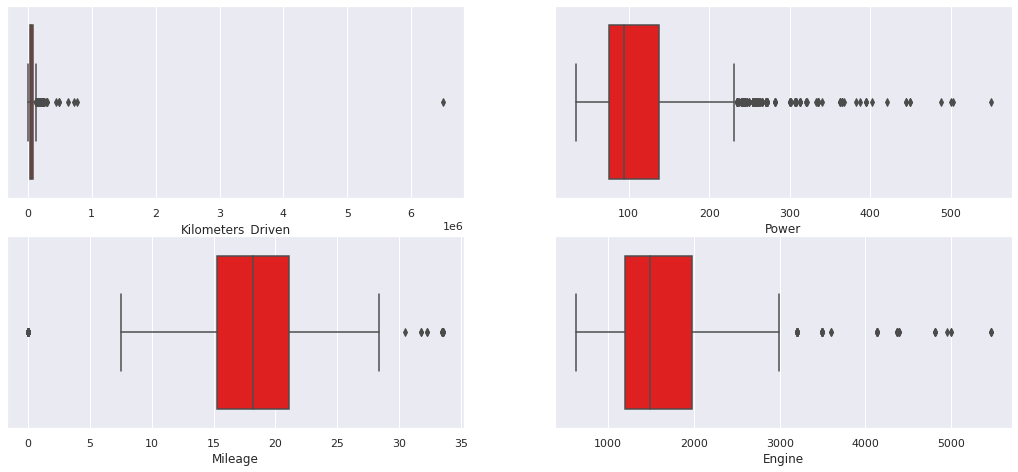

In [ ]:
col = ['Kilometers_Driven','Power','Mileage','Engine'] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.boxplot(x=v, data=df,color='red')
plt.show()

In [ ]:
df.drop(df[df['Kilometers_Driven']>300000].index,inplace=True,axis=0)


In [ ]:
df.drop(df[df['Power']>480].index,inplace=True,axis=0)


Visualize after removing Major outliers


0 Kilometers_Driven
1 Power
2 Mileage
3 Engine


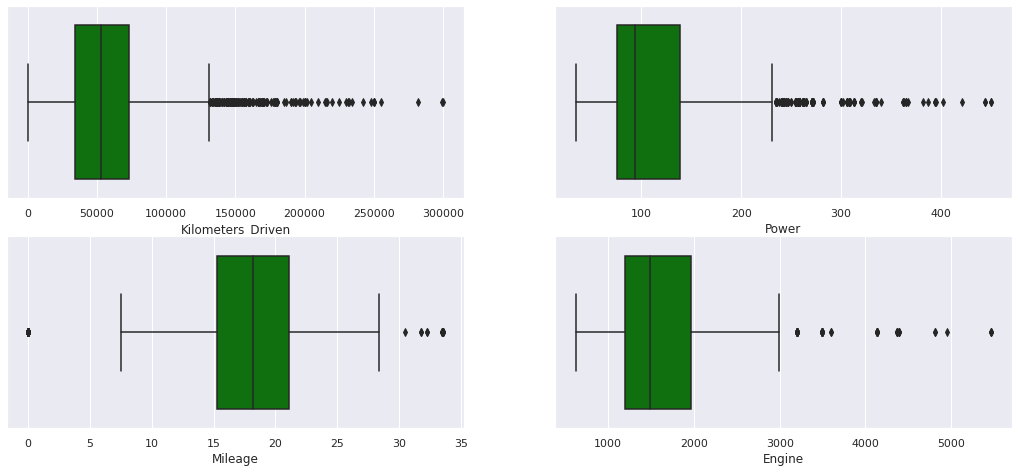

In [ ]:
col = ['Kilometers_Driven','Power','Mileage','Engine'] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.boxplot(x=v, data=df,color='green')
plt.show()

In [ ]:
df.shape

(5963, 13)

Data distribution of output Performance Score feature


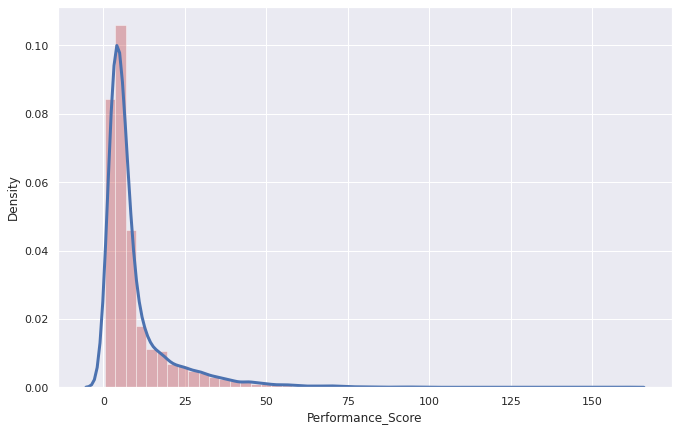

In [ ]:
plt.figure(figsize=(11,7))
plt.subplot(1,1,1)
sns.distplot(df['Performance_Score'],color='r',kde_kws={'linewidth':3,'color':'b'});
plt.show()

0 Kilometers_Driven
1 Mileage
2 Engine
3 Performance_Score


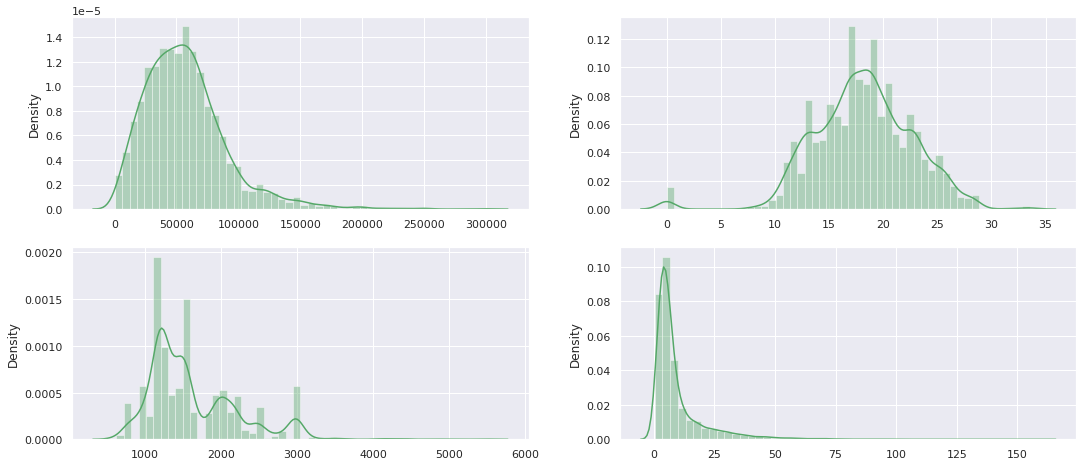

In [ ]:
col = ['Kilometers_Driven','Mileage','Engine',"Performance_Score"] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.distplot(x=df[v],color='g')
plt.show()

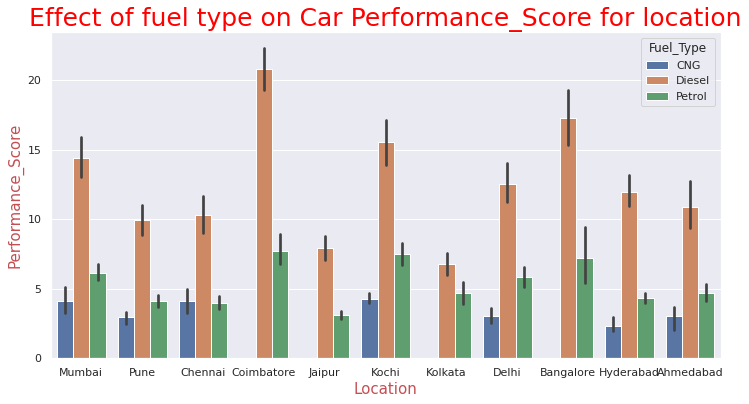

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,y="Performance_Score",x='Location',hue='Fuel_Type')
plt.xlabel("Location",size=15,c="r")
plt.ylabel("Performance_Score",size=15,c="r")
plt.title("Effect of fuel type on Car Performance_Score for location",size=25,c="red")
plt.show()

conclusion :
Here clearly we can see that Performance Score of Diesel car is more than than petrol irespective of location

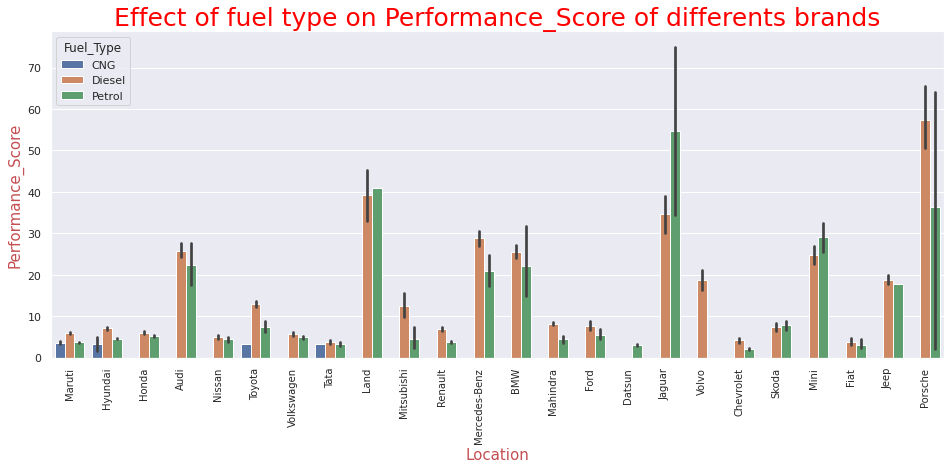

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(data=df,y="Performance_Score",x='Name',hue='Fuel_Type')
plt.xlabel("Location",size=15,c="r")
plt.ylabel("Performance_Score",size=15,c="r")
plt.xticks(rotation="vertical",size=10)
plt.title("Effect of fuel type on Performance_Score of differents brands",size=25,c="red")
plt.show()

conclusion :
Here clearly we can see that Performance_Score of Diesel car for some brands such as jaguar and BMW is less than petrol

0 Kilometers_Driven
1 Mileage
2 Engine
3 Power


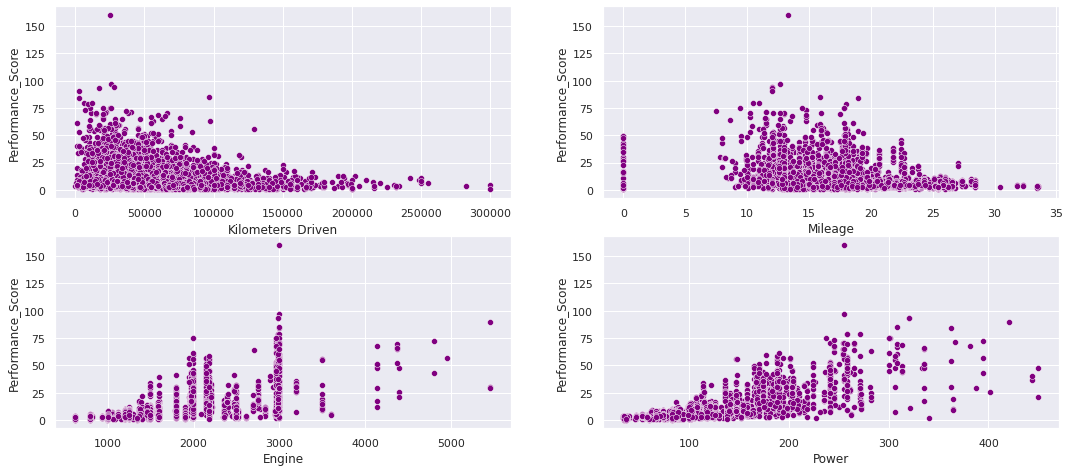

In [ ]:
col = ['Kilometers_Driven','Mileage','Engine',"Power"] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.scatterplot(x=df[v],y=df['Performance_Score'],color='purple')
plt.show()

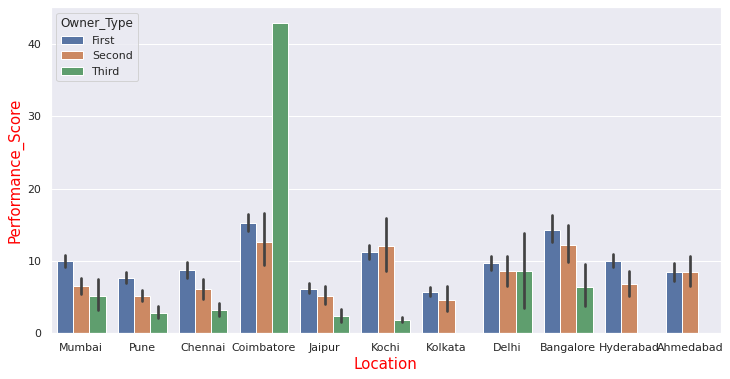

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,y="Performance_Score",x='Location',hue='Owner_Type')
plt.xlabel("Location",size=15,c="red")
plt.ylabel("Performance_Score",size=15,c="red")
plt.show()

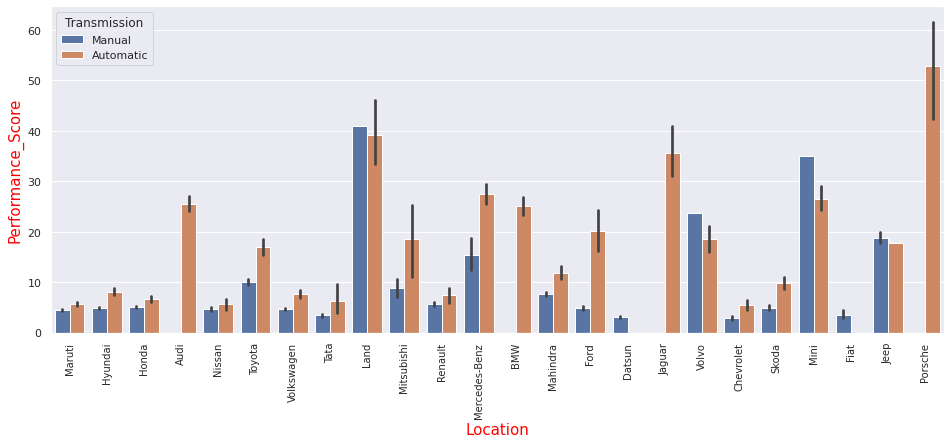

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(data=df,y="Performance_Score",x='Name',hue='Transmission')
plt.xlabel("Location",size=15,c="red")
plt.ylabel("Performance_Score",size=15,c="red")
plt.xticks(rotation="vertical",size=10)
plt.show()

conclusion :
Car with Automatic Transmission system has more Performance_Score than manual that is OK
But In real life practise Performance_Score of car is not highly depends on Transmission system

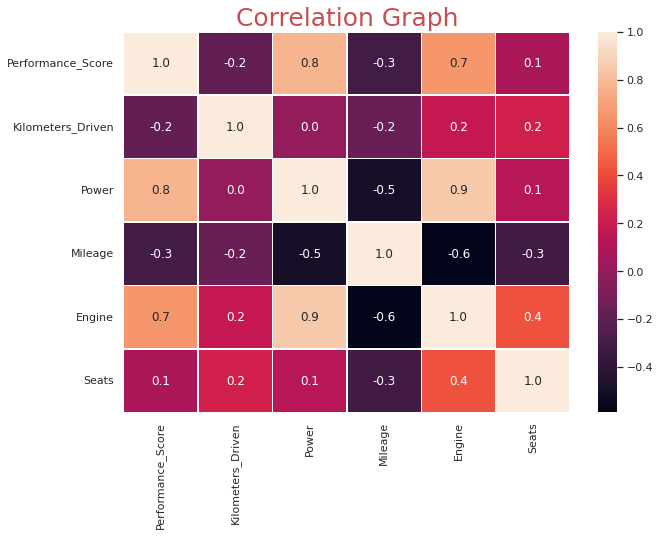

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df[["Performance_Score","Kilometers_Driven","Power","Mileage","Engine","Seats"]].corr(), annot=True,linewidths=.5,fmt='.1f')
plt.title("Correlation Graph",c="r",size=25)
plt.show()

conclusion :
Here we can see that Engine Power has strong positive realtion with Performance_Score
But we can also realise that Engine and Power itself has strong relation So In order to avoid multicolinearity problem we will drop one which has less correlation with o/p. 
Power has good relation with Performance_Score as compared to Engine so we drop Engine
Clearly we can say that more Engine CC more Power more the Performance_Score of car but one power feature is sufficent to get all info

In [ ]:
df.drop(['Mileage','Seats','Engine','Transmission'],axis=1,inplace=True)

Features Construction : 
We create single feature by combining Compnay Name and Its model
so we will have completely new feature of name Car which store info of Car and its model. 
Performance_Score of car is base not only on its company, its model also matter
If you are buying BMW 2 series and 7 series, company is same but in Performance_Score there is lots of difference.

In [ ]:
df['Car'] = df['Name'].astype(str) + " " + df['Model']

Drop unwanted columns

In [ ]:
df.drop(['Name','Model'],axis=1,inplace=True)

In [ ]:
df = df[['Car','Location','Year','Kilometers_Driven','Owner_Type','Fuel_Type','Power','Performance_Score']]

In [ ]:
df['Car'].unique

<bound method Series.unique of 0         Maruti Wagon
1        Hyundai Creta
2           Honda Jazz
3        Maruti Ertiga
4              Audi A4
             ...      
6014      Maruti Swift
6015     Hyundai Xcent
6016     Mahindra Xylo
6017      Maruti Wagon
6018    Chevrolet Beat
Name: Car, Length: 5963, dtype: object>

See total no of categories of cars

In [ ]:
len(df['Car'].value_counts())

200

In [ ]:
lst = df['Car'].unique()
no_models= []
for i in lst:
    df1=df[df['Car']==i]
    no_models.append(len(df1))

In [ ]:
dic = dict(zip(list(lst),no_models))
sort_orders = sorted(dic.items(), key=lambda x: x[1])
for i in sort_orders:
    print(i[0], i[1])

Mini Countryman 1
Mini Clubman 1
Porsche Boxster 1
Mahindra XUV300 1
Volkswagen Beetle 1
Volkswagen Tiguan 1
Nissan Evalia 1
Mitsubishi Montero 1
Tata Venture 1
Toyota Platinum 1
Mercedes-Benz CLS-Class 1
Ford Classic 1
Datsun Redi 1
Ford Mustang 1
Ford Fusion 1
Mercedes-Benz SL-Class 1
Maruti Versa 1
Honda WR-V 1
Mercedes-Benz SLC 2
Audi RS5 2
Renault Lodgy 2
Audi A8 2
Nissan Teana 2
Volvo S80 2
Mitsubishi Cedia 2
Mercedes-Benz GLS 2
Mahindra Renault 2
Mitsubishi Outlander 2
Chevrolet Captiva 2
Fiat Punto 2
Mahindra Logan 2
Chevrolet Tavera 2
Volvo XC90 2
Mitsubishi Lancer 2
BMW Z4 2
Nissan X-Trail 3
Mercedes-Benz C-Class 3
BMW 1 3
Mahindra NuvoSport 3
Jaguar XE 3
Tata Xenon 3
Honda BR-V 3
Renault Captur 3
Maruti S-Cross 3
Audi TT 3
Mercedes-Benz SLK-Class 3
Renault Koleos 3
Toyota Qualis 3
Audi A7 3
Ford Freestyle 3
Maruti Grand 3
Tata Nexon 3
Honda WRV 4
Volvo V40 4
Mahindra Verito 4
Hyundai Tucson 4
Audi A3 4
Tata Hexa 4
Fiat Avventura 4
Ford Aspire 4
Tata Bolt 4
Volkswagen CrossPo

In [ ]:
sortedDict = dict( sorted(dic.items(), key=lambda x: x[0].lower()) )
for k,v in sortedDict.items():
    print('{}:{}'.format(k,v))

Audi A3:4
Audi A4:77
Audi A6:49
Audi A7:3
Audi A8:2
Audi Q3:27
Audi Q5:30
Audi Q7:38
Audi RS5:2
Audi TT:3
BMW 1:3
BMW 3:98
BMW 5:68
BMW 6:7
BMW 7:13
BMW X1:32
BMW X3:14
BMW X5:23
BMW X6:6
BMW Z4:2
Chevrolet Aveo:14
Chevrolet Beat:46
Chevrolet Captiva:2
Chevrolet Cruze:18
Chevrolet Enjoy:9
Chevrolet Optra:12
Chevrolet Sail:8
Chevrolet Spark:10
Chevrolet Tavera:2
Datsun GO:6
Datsun Redi:1
Datsun redi-GO:6
Fiat Avventura:4
Fiat Grande:5
Fiat Linea:12
Fiat Punto:2
Ford Aspire:4
Ford Classic:1
Ford Ecosport:53
Ford EcoSport:42
Ford Endeavour:38
Ford Fiesta:40
Ford Figo:101
Ford Freestyle:3
Ford Fusion:1
Ford Ikon:14
Ford Mustang:1
Honda Accord:26
Honda Amaze:106
Honda BR-V:3
Honda Brio:60
Honda BRV:5
Honda City:269
Honda Civic:32
Honda CR-V:27
Honda Jazz:58
Honda Mobilio:16
Honda WR-V:1
Honda WRV:4
Hyundai Accent:18
Hyundai Creta:93
Hyundai Elantra:22
Hyundai Elite:14
Hyundai EON:60
Hyundai Getz:10
Hyundai Grand:152
Hyundai i10:154
Hyundai i20:245
Hyundai Santa:17
Hyundai Santro:75
Hyundai 

Features Selection: As seee there are 200 cars categories
so we will drop all categories with very less frequency or counts
These will really helpful as its reduce computation time and improve machine effectiveness

In [ ]:
len(df['Car'].value_counts()[df['Car'].value_counts()<10])

95

In [ ]:
df['Car'].value_counts()[df['Car'].value_counts()<10]

Tata Safari          9
Mahindra TUV         9
Chevrolet Enjoy      9
Chevrolet Sail       8
Volkswagen Passat    8
                    ..
Nissan Evalia        1
Mini Countryman      1
Volkswagen Tiguan    1
Volkswagen Beetle    1
Honda WR-V           1
Name: Car, Length: 95, dtype: int64

Lets drop categ with frequecy less than 10

In [ ]:
l = df['Car'].value_counts()[df['Car'].value_counts()<10].index
df[df['Car'].isin(l)]

,Car,Location,Year,Kilometers_Driven,Owner_Type,Fuel_Type,Power,Performance_Score
21,Maruti S,Bangalore,2015,55392,Second,Diesel,88.50,8.25
28,Honda WRV,Kochi,2018,37430,First,Petrol,88.70,9.90
49,Mahindra Thar,Jaipur,2012,75800,Second,Diesel,105.00,5.50
58,Nissan X-Trail,Hyderabad,2010,121812,First,Diesel,147.60,7.75
67,Mercedes-Benz C-Class,Coimbatore,2019,15369,First,Diesel,194.00,35.67
...,...,...,...,...,...,...,...,...
5928,Mahindra NuvoSport,Coimbatore,2018,37323,Second,Diesel,100.00,7.29
5982,Tata Hexa,Jaipur,2016,39000,First,Diesel,153.86,13.50
5990,Tata New,Pune,2008,86000,Third,Diesel,138.00,0.60
5999,Tata Bolt,Chennai,2016,10000,First,Petrol,88.70,4.00


In [ ]:
df.drop(df[df['Car'].isin(l)].index,inplace=True,axis=0)
df_new = df.copy()

shape of Data after EDA

In [ ]:
df.shape

(5613, 8)

In [ ]:
df.dtypes

Car                   object
Location              object
Year                  object
Kilometers_Driven      int64
Owner_Type            object
Fuel_Type             object
Power                float64
Performance_Score    float64
dtype: object

In [ ]:
df[['Car','Location','Year','Owner_Type','Fuel_Type']].nunique()

Car           105
Location       11
Year           18
Owner_Type      3
Fuel_Type       3
dtype: int64

conclusion: We have consider All important features base on above visualisation and domian knowledge

In [ ]:
df1=df.copy()

Encoding of Categorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder

Label Encoding on 'Car','Location' and 'Fuel_Type' columns

In [ ]:
le = LabelEncoder()
lst = ['Car','Location','Fuel_Type']
for i in lst:
    le = LabelEncoder()
    df[i]=le.fit_transform(df[i])    

Ordinal Encoding on 'Owner_Type' and 'Year'

In [ ]:
df['Owner_Type'].value_counts()

First     4612
Second     900
Third      101
Name: Owner_Type, dtype: int64

In [ ]:
dic = {'First':2,'Second':1,'Third':0}
df['Year'].value_counts()

2014              754
2015              704
2016              700
2013              607
2012              556
2017              535
2011              434
2010              316
2018              268
2009              187
2008              161
2007              113
2019               87
2006               74
2005               53
2004               27
less than 2003     26
2003               11
Name: Year, dtype: int64

In [ ]:
dic1 = {'2019':17,"2018":16,"2017":15,"2016":14,"2015":13,"2014":12,"2013":11,"2012":10,"2011":9,"2010":8,"2009":7,"2008":6,"2007":5,"2006":4,"2005":3,"2004":2,"2003":1,"less than 2003":0 }
df['Owner_Type']=df['Owner_Type'].map(dic)
df['Year']=df['Year'].map(dic1)

Model Training and Model Evaluation

In [ ]:
X = df.drop("Performance_Score",axis=1)   #X --- > Independent variables
Y= df['Performance_Score']                #Y --- > Dependent variables
Y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Performance_Score, Length: 5613, dtype: float64

Train-Test split (80/30 ratio)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred= lr.predict(X_test)
print("Accuracy on Traing set: ",lr.score(X_train,Y_train))
print("Accuracy on Testing set: ",lr.score(X_test,Y_test))

Accuracy on Traing set:  0.6779073313110087
Accuracy on Testing set:  0.6861011272608684


RandomForestRegressor

In [ ]:
X_test.head()

,Car,Location,Year,Kilometers_Driven,Owner_Type,Fuel_Type,Power
3665,93,3,15,18351,2,2,37.48
2604,78,9,14,15000,2,2,189.08
1551,103,8,9,50000,2,2,73.90
2313,104,9,9,47000,2,1,108.50
2375,54,6,7,65000,1,2,66.10


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, Y_train)
y_pred= rf.predict(X_test)
print(type(X_test))
print("Accuracy on Traing set: ",rf.score(X_train,Y_train))
print("Accuracy on Testing set: ",rf.score(X_test,Y_test))

<class 'pandas.core.frame.DataFrame'>
Accuracy on Traing set:  0.9837027978796756
Accuracy on Testing set:  0.9105006903903593


Use Predict function to get performance score. The higher the score implies better the performance 

In [ ]:

details1 = { 'Car': ['93'],	'Location': ['3'],	'Year' :['15'],	'Kilometers_Driven':['50000'],	'Owner_Type':	['2'], 'Fuel_Type':['2'],	'Power':['37'] }
details2 = { 'Car': ['93'],	'Location': ['3'],	'Year' :['22'],	'Kilometers_Driven':['2000'],	'Owner_Type':	['2'], 'Fuel_Type':['2'],	'Power':['37'] }

# creating a Dataframe object 
df = pd.DataFrame(details1)
y_pred1= rf.predict(df)
print(y_pred1)

df = pd.DataFrame(details2)
y_pred2= rf.predict(df)
print(y_pred2)


[3.1937]
[4.1103]


We found that RandomForestRegressor is better performing that LinearRegression. So we use RandomForestRegressor for our model

Model Evaluation

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(Y_test, y_pred))

		Error Table
Mean Absolute Error      :  1.528673556795046
Mean Squared  Error      :  10.366621093918717
Root Mean Squared  Error :  3.2197237604985176
R Squared Error          :  0.9076863897102971


On Conclusion, We can say that we can use this model built to choose best performing car to migrate VM or while assigning jobs to the car. So that when ever break down or accident or engine failure or break failure happens we can avoid not only car damage but also we can avoid losing of the job assigned to it.